In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


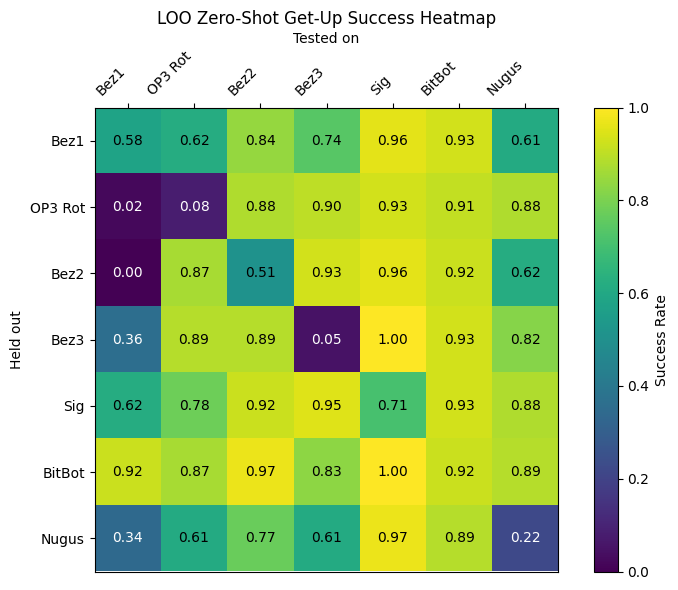

In [2]:

# Data from the LOO experiment
robots = ["Bez1", "OP3 Rot", "Bez2", "Bez3", "Sig", "BitBot", "Nugus"]
data = np.array([
    [0.58, 0.62, 0.84, 0.74, 0.96, 0.93, 0.61],
    [0.02, 0.08, 0.88, 0.90, 0.93, 0.91, 0.88],
    [0.00, 0.87, 0.51, 0.93, 0.96, 0.92, 0.62],
    [0.36, 0.89, 0.89, 0.05, 1.00, 0.93, 0.82],
    [0.62, 0.78, 0.92, 0.95, 0.71, 0.93, 0.88],
    [0.92, 0.87, 0.97, 0.83, 1.00, 0.92, 0.89],
    [0.34, 0.61, 0.77, 0.61, 0.97, 0.89, 0.22]
])

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(data, cmap='viridis', vmin=0, vmax=1)
ax.xaxis.tick_top()             # move x‑axis ticks to the top
ax.xaxis.set_label_position('top')  # move the x‑axis label as well
# Set ticks and labels
ax.set_xticks(np.arange(len(robots)))
ax.set_yticks(np.arange(len(robots)))
ax.set_xticklabels(robots)
ax.set_yticklabels(robots)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Annotate cells with values
for i in range(len(robots)):
    for j in range(len(robots)):
        ax.text(j, i, f"{data[i, j]:.2f}", ha="center", va="center",
                color="w" if data[i, j] < 0.5 else "black")

# Labels and colorbar
ax.set_xlabel("Tested on")
ax.set_ylabel("Held out")
ax.set_title("LOO Zero-Shot Get-Up Success Heatmap")
fig.colorbar(cax, label="Success Rate")
plt.tight_layout()
plt.show()

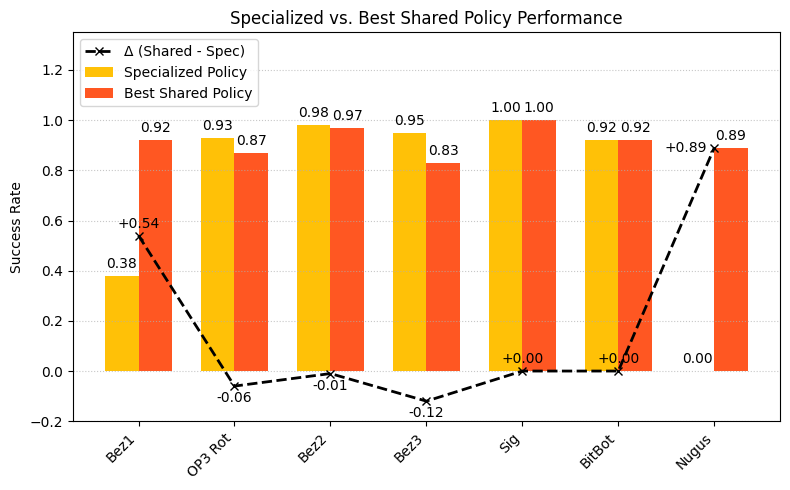

In [5]:
# Data for specialized vs. shared policy success rates
robots = ["Bez1", "OP3 Rot", "Bez2", "Bez3", "Sig", "BitBot", "Nugus"]
specialized = np.array([0.38, 0.93, 0.98, 0.95, 1.00, 0.92, 0.00])
shared_best = np.array([0.92, 0.87, 0.97, 0.83, 1.00, 0.92, 0.89])

# Compute delta (shared - specialized)
delta = shared_best - specialized

x = np.arange(len(robots))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Plot grouped bars
bar1 = ax.bar(x - width/2, specialized, width, label='Specialized Policy', color='#FFC107')
bar2 = ax.bar(x + width/2, shared_best, width, label='Best Shared Policy', color='#FF5722')

# Plot delta as a dashed line with markers
ax.plot(x, delta, marker='x', color='black', linestyle='--', linewidth=2, label='Δ (Shared - Spec)', zorder=5)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(robots, rotation=45, ha="right")
ax.set_ylabel('Success Rate')
ax.set_title('Specialized vs. Best Shared Policy Performance')
ax.set_ylim(-0.2, 1.35)

# Annotate bar heights
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

# Annotate delta points
for xi, d in zip(x, delta):
    va = 'bottom' if d >= 0 else 'top'
    offset = 0.02 if d >= 0 else -0.02
    offset2 = 0.3 if d == 0.89 else 0
    offset3 = -0.05 if d == 0.89 else 0
    ax.text(xi-offset2, d + offset + offset3, f"{d:+.2f}", ha='center', va=va)

# Legend and grid
ax.legend(loc='upper left')
ax.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

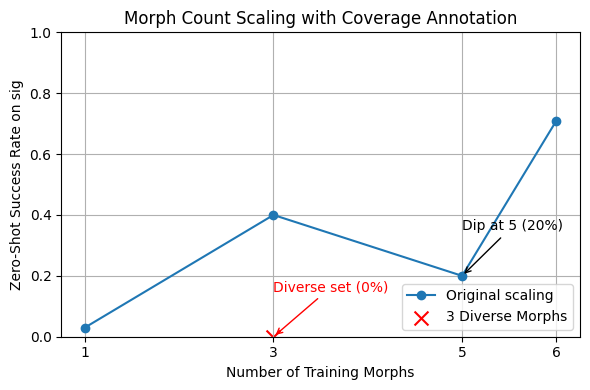

In [4]:
# Base Morph Count Scaling data
training_counts = [1, 3, 5, 6]
success_rates = [0.03, 0.40, 0.20, 0.71]

# Similar vs Diverse data at 3
diverse_success = 0.00
similar_success = 0.53

fig, ax = plt.subplots(figsize=(6, 4))

# Plot base scaling curve
ax.plot(training_counts, success_rates, marker='o', label='Original scaling')

# Annotate the dip at 5 morphs
ax.annotate('Dip at 5 (20%)', xy=(5, 0.20), xytext=(5, 0.35),
            arrowprops=dict(arrowstyle='->'))

# Add diverse-only marker at 3 morphs
ax.scatter([3], [diverse_success], color='red', marker='x', s=100, label='3 Diverse Morphs')
ax.annotate('Diverse set (0%)', xy=(3, 0.00), xytext=(3, 0.15),
            arrowprops=dict(arrowstyle='->', color='red'), color='red')

# Formatting
ax.set_xticks(training_counts)
ax.set_xlabel('Number of Training Morphs')
ax.set_ylabel('Zero-Shot Success Rate on sig')
ax.set_title('Morph Count Scaling with Coverage Annotation')
ax.set_ylim(0, 1)
ax.grid(True)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

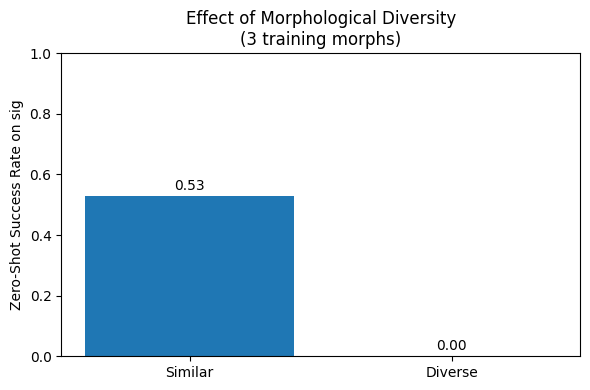

In [3]:
# Data for Similar vs. Diverse Morph experiment
conditions = ["Similar", "Diverse"]
success_rates = [0.53, 0.00]

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(conditions, success_rates)
ax.set_ylim(0, 1)
ax.set_ylabel("Zero-Shot Success Rate on sig")
ax.set_title("Effect of Morphological Diversity\n(3 training morphs)")
# Annotate bars
for bar, rate in zip(bars, success_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{rate:.2f}", ha='center')
plt.tight_layout()
plt.show()

In [6]:
# Step 1: Read the CSV file, skipping lines starting with '#'
monitor_df = pd.read_csv('/home/jonathan/catkin_ws/src/frasa/frasa_env/0.monitor.csv', comment='#')

# Step 2: Inspect the data
print("Data from monitor.csv:")
print(monitor_df.head())

# Step 3: Compute some basic statistics (e.g., average reward)
average_reward = monitor_df['r'].mean()
print("Average Reward:", average_reward)

# Step 4: Plot the rewards per episode
plt.figure(figsize=(10, 5))
plt.plot(monitor_df['t'], monitor_df['r'], label='Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards over Time')
plt.legend()
plt.xlim(0, 2500)

plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jonathan/catkin_ws/src/frasa/frasa_env/0.monitor.csv'